In [1]:
# This is query for the Gini Coefficient template
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
# Path for all the results
path="/mnt/indexer-build/migrated_data/curated/mining/"

In [3]:
def extractorYear(year):
    return(int(str(year)[:4]))

def extractorWeek(year):
    return(int(str(year)[4:]))

In [4]:
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
frame.rename(columns={'Year_no':'year', 'Week_no':'week'}, inplace=True)
final = frame.sort_values(by=['year','week'])

In [8]:
extra = final[((final.year == 2018) & (final.week < 26)) | ((final.year == 2022) & (final.week > 34))]

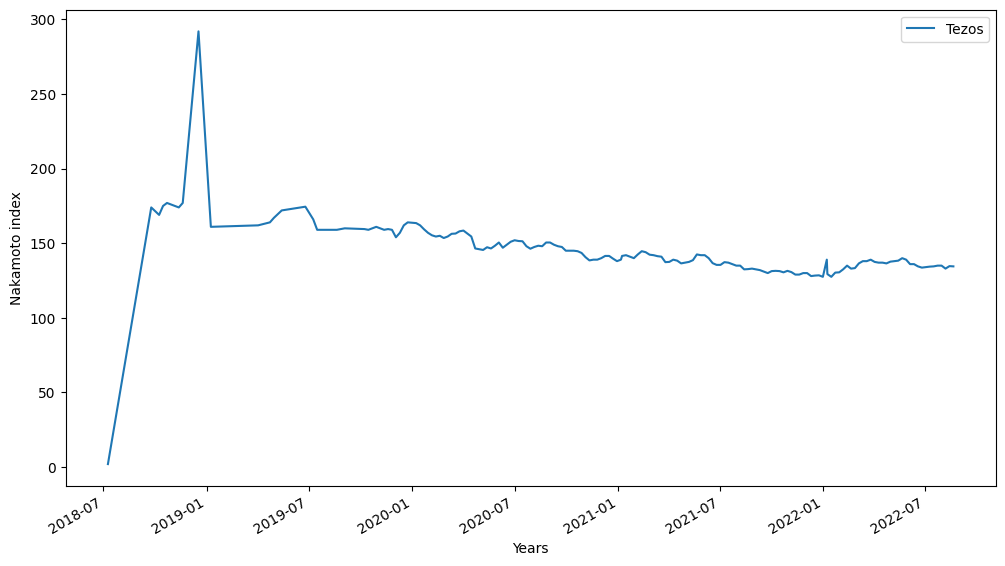

In [10]:
# Determine the date
final['date'] = pd.to_datetime(final.assign(day=1, month=1)[['year', 'month', 'day']])+pd.to_timedelta(final.week*7, unit='days')

# Plot
fig, ax = plt.subplots()
final.plot(x='date', y='Avg_Nakamoto_index', ax=ax, figsize=(12,7))
ax.set_xlabel('Years')
ax.set_ylabel('Nakamoto index')
ax.legend(['Tezos'])